Nom: Majoul 
Prénom: Tasnim  
E-mail: tasnim.majoul@essai.ucar.tn   
Matricule: 2200030       

# Projet de Programmation Mathématique

Vous devez remettre un rapport individuel au plus tard dimanche le 30 avril 2023 avant 23h59, dans Google Classroom, sous la forme d'un fichier électronique de format IPYNB, nommé ``NomPrenom.ipynb``. Le rapport doit contenir votre nom, prénom, matricule d'étudiant, et email institutionnel. Aucune remise papier ou par courriel ne sera acceptée. La note zéro sera attribuée à toute remise qui ne respecte pas les directives.   

Pour vos analyses, vous devez d'abord obtenir avec votre matricule d'étudiant un ensemble personnalisé de données. Toutes vos réponses doivent correspondre à votre ensemble de données.   

Chacune de vos réponses doit être complète, expliquée et justifiée. Lors de la cor\-rec\-tion, il sera tenu compte de la qualité de la présentation, la pertinence des analyses et l'initiative dont vous ferez preuve dans votre rapport. Sur les 20 points, 18 sont alloués aux analyses, commentaires pertinents, etc. et 2 à la présentation. Les analyses, les tableaux et les graphiques du rapport doivent être produits avec le logiciel ``Python``. Tout cas de plagiat sera sévèrement sanctionné, ainsi qu'une note 0 à ce devoir. 


importation de bibliothèques 

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

importation de la base de donnée 

In [ ]:
import seaborn as sns
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Choix de la donnée
Insérer le matricule pour fixer le dataset.

In [ ]:
matricule = 2200030 #Insérer le numéro/matricule de la carte d'étudiant
dataframe = data.sample(220, random_state = matricule)
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
7017,1.00,Good,F,SI1,63.7,58.0,4158,6.29,6.34,4.02
13603,1.02,Very Good,E,VS2,62.8,59.0,5565,6.39,6.44,4.03
9575,1.00,Premium,D,SI2,61.6,58.0,4626,6.45,6.37,3.95
34715,0.37,Premium,D,SI1,61.9,59.0,874,4.65,4.62,2.87
43314,0.55,Ideal,H,VS2,61.9,54.0,1402,5.25,5.28,3.26


In [ ]:
input_cols = ["carat", "depth", "table"]
categorical_cols = ["color", "clarity"]
output_cols = ["price"]

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array[:3], targets_array[:3]

(array([[ 1.  , 63.7 , 58.  ],
        [ 1.02, 62.8 , 59.  ],
        [ 1.  , 61.6 , 58.  ]]),
 array([[4158],
        [5565],
        [4626]]))

# Contribution de l'élève

# statistique descreptive 

Dans cette section, nous allons nous concentrer sur la préparation et le traitement de notre jeu de données en effectuant des analyses descriptives. L'objectif est de mieux comprendre les relations entre les différentes variables quantitatives étudiées. Pour cela, nous allons notamment utiliser une matrice de corrélation, un outil statistique qui permet de mesurer la force et la direction d'une relation linéaire entre deux variables. En affichant toutes les corrélations possibles entre les variables quantitatives dans une seule table, la matrice de corrélation offre une représentation visuelle claire et complète. Cette étude statistique nous permettra d'obtenir une vue d'ensemble des relations entre les variables de notre jeu de données, ce qui pourra nous aider à mieux interpréter les résultats de nos analyses ultérieures.

In [ ]:
import pandas as pd
# Obtenir les statistiques descriptives de chaque variable
stat_desc = dataframe.describe()

# Afficher les statistiques descriptives
print(stat_desc)

            carat       depth       table         price           x  \
count  220.000000  220.000000  220.000000    220.000000  220.000000   
mean     0.797000   61.699091   57.653182   3876.863636    5.753545   
std      0.440982    1.423706    2.428360   3644.707981    1.065483   
min      0.230000   56.400000   52.000000    394.000000    3.920000   
25%      0.410000   61.000000   56.000000   1011.750000    4.750000   
50%      0.720000   61.900000   57.000000   2509.500000    5.750000   
75%      1.020000   62.500000   59.000000   5595.750000    6.550000   
max      2.100000   65.900000   67.000000  15984.000000    8.210000   

                y           z  
count  220.000000  220.000000  
mean     5.756318    3.550955  
std      1.055191    0.656797  
min      4.000000    2.380000  
25%      4.787500    2.967500  
50%      5.770000    3.550000  
75%      6.530000    4.020000  
max      8.180000    5.120000  


le code ci-dessus contient les information suivante 
count : nombre d'observations
mean : moyenne
std : écart-type
min : minimum
25% : premier quartile
50% : médiane (deuxième quartile)
75% : troisième quartile
max : maximum


La variable 'carat' a une moyenne de 0,797 et une médiane de 0,72. Le minimum est de 0,23 carat et le maximum est de 2,1 carats. L'écart-type est de 0,44, ce qui indique une variation importante dans les tailles de diamants de notre échantillon.
La variable 'depth' a une moyenne de 61,7 et une médiane de 61,9. Le minimum est de 56,4 et le maximum est de 65,9. L'écart-type est de 1,42, ce qui indique une faible variation dans les profondeurs de coupe des diamants de notre échantillon.
La variable 'table' a une moyenne de 57,65 et une médiane de 57. Le minimum est de 52 et le maximum est de 67. L'écart-type est de 2,43, ce qui indique une variation modérée dans les largeurs de la table des diamants de notre échantillon.
La variable 'price' a une moyenne de 3876,86 et une médiane de 2509,5. Le prix minimum est de 394 dollars et le prix maximum est de 15984 dollars. L'écart-type est de 3644,71, ce qui indique une variation importante dans les prix des diamants de notre échantillon.
Les variables 'x', 'y' et 'z' représentent les dimensions en millimètres du diamant selon les trois axes. La moyenne de 'x' est de 5,75, la moyenne de 'y' est de 5,76 et la moyenne de 'z' est de 3,55. Les médianes respectives sont de 5,75, 5,77 et 3,55. Les écarts-types sont de 1,07 pour 'x' et 'y' et de 0,65 pour 'z'. On peut observer que 'x', 'y' et 'z' sont relativement similaires en termes de moyenne et de médiane, ce qui suggère que les diamants de notre échantillon ont une forme relativement équilibrée.

# les histogrammes de 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'

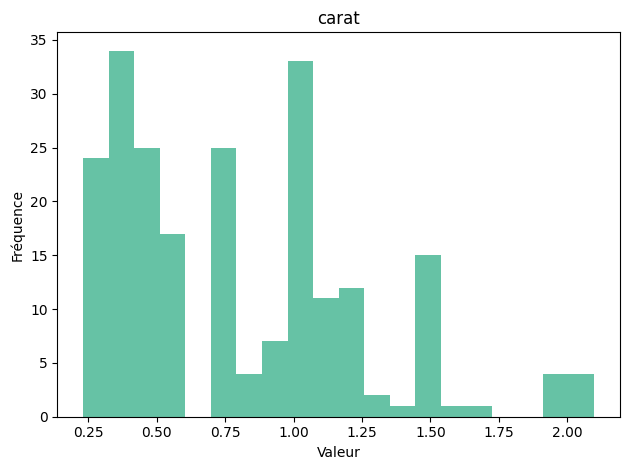

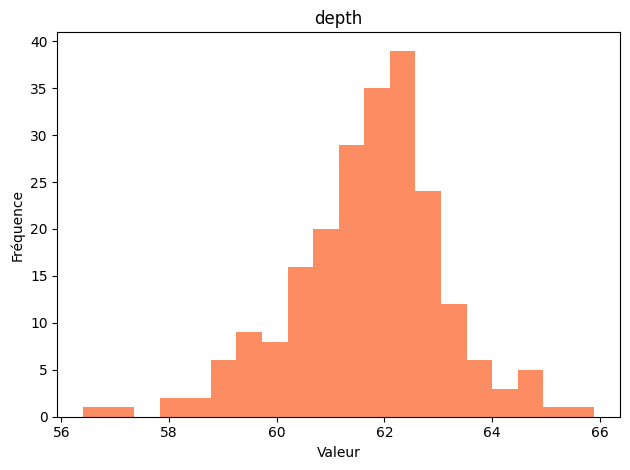

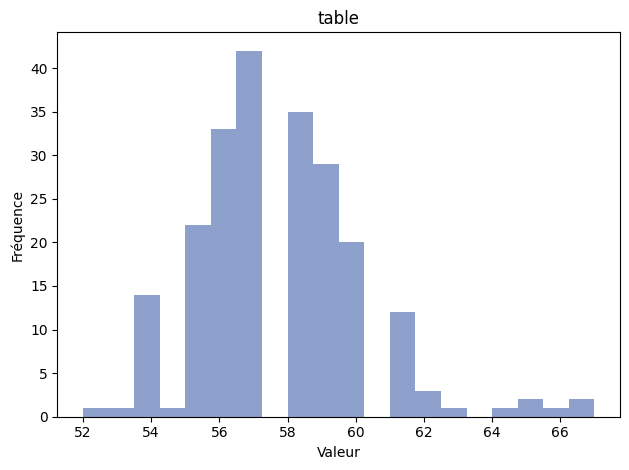

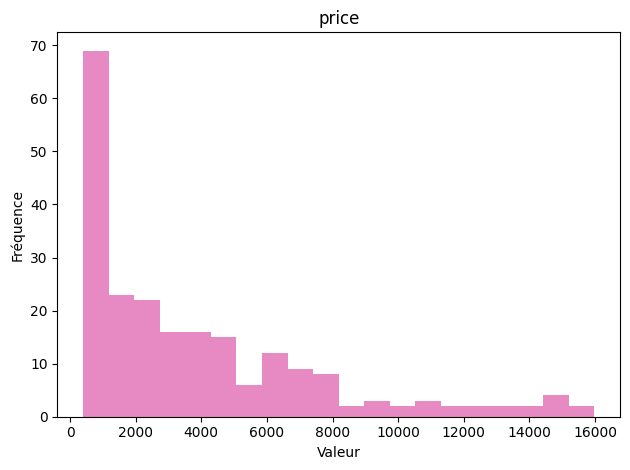

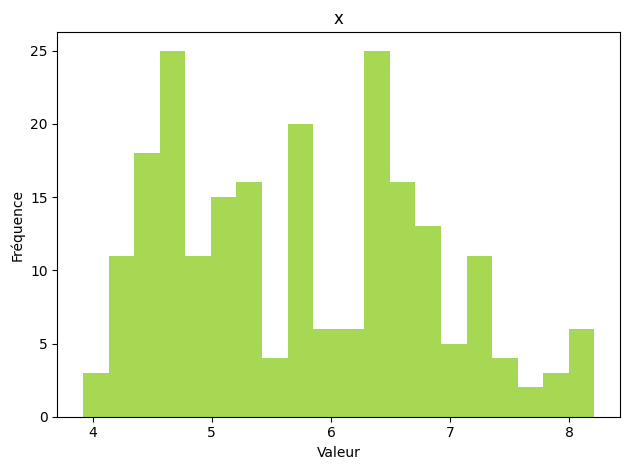

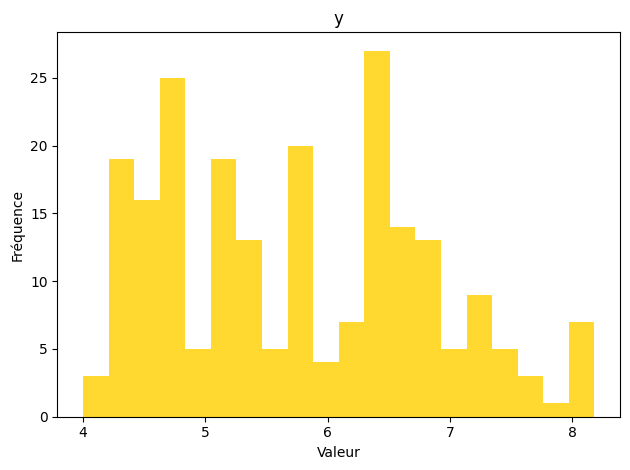

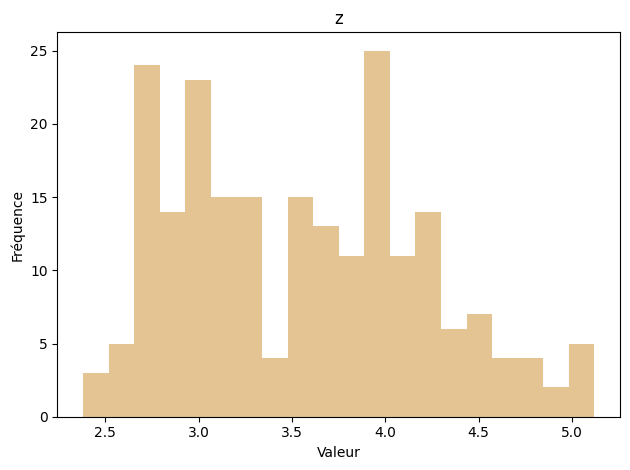

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les variables continues
variables_continues = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Définir une palette de couleurs
couleurs = sns.color_palette("Set2", len(variables_continues))

# Afficher les histogrammes colorés et de taille réduite pour chaque variable continue
for i, variable in enumerate(variables_continues):
    plt.figure(i)
    plt.hist(dataframe[variable], bins=20, color=couleurs[i])
    plt.title(variable)
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

Les histogrammes ci-dessus sont utilisé pour représenter les distribution des differentes variables quantitatives. Ces graphes nous permettent de visualiser la forme de la distribution des variables, pour identifier les modes, les valeurs aberrantes, les écarts et la dispersion des données.

carat : La distribution de la variable 'carat' est bimodale, ce qui suggère qu'il existe deux groupes distincts de diamants. 

on peut observer que les variables depth et price sont unimodale
on observe aussi que les variables table , x ,y et z sont bimodales ce qui enforce la suggestion il existe deux groupes distincts de diamant.

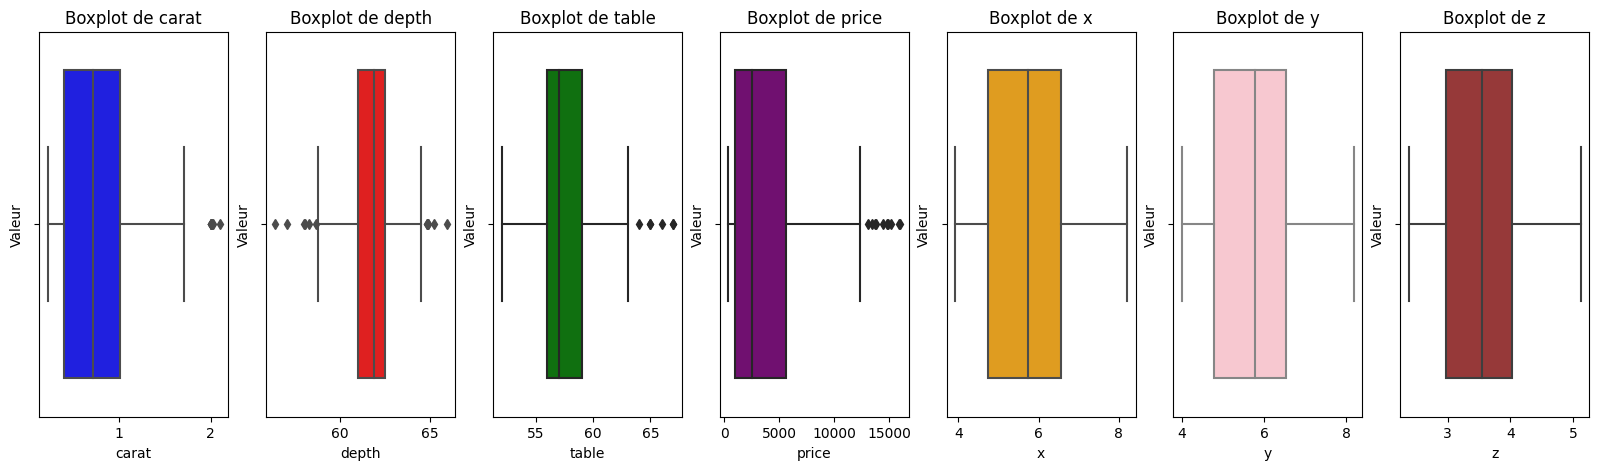

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Variables pour créer les boxplots
variables = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Couleurs pour chaque variable
couleurs = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'brown']

# Créer les boxplots pour chaque variable
fig, axs = plt.subplots(ncols=len(variables), figsize=(20, 5))
for i, variable in enumerate(variables):
    sns.boxplot(x=dataframe[variable], color=couleurs[i], ax=axs[i])
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Valeur')
    axs[i].set_title('Boxplot de {}'.format(variable))

plt.show()


Ces boxplots donnent des informations sur la médiane, le quartile, l'étendue, les valeurs aberrantes (ou outliers) et la symétrie de la distribution de chaque variable.

 La distribution des variables 'carat'et 'price' sont fortement asymétrique vers la droite.


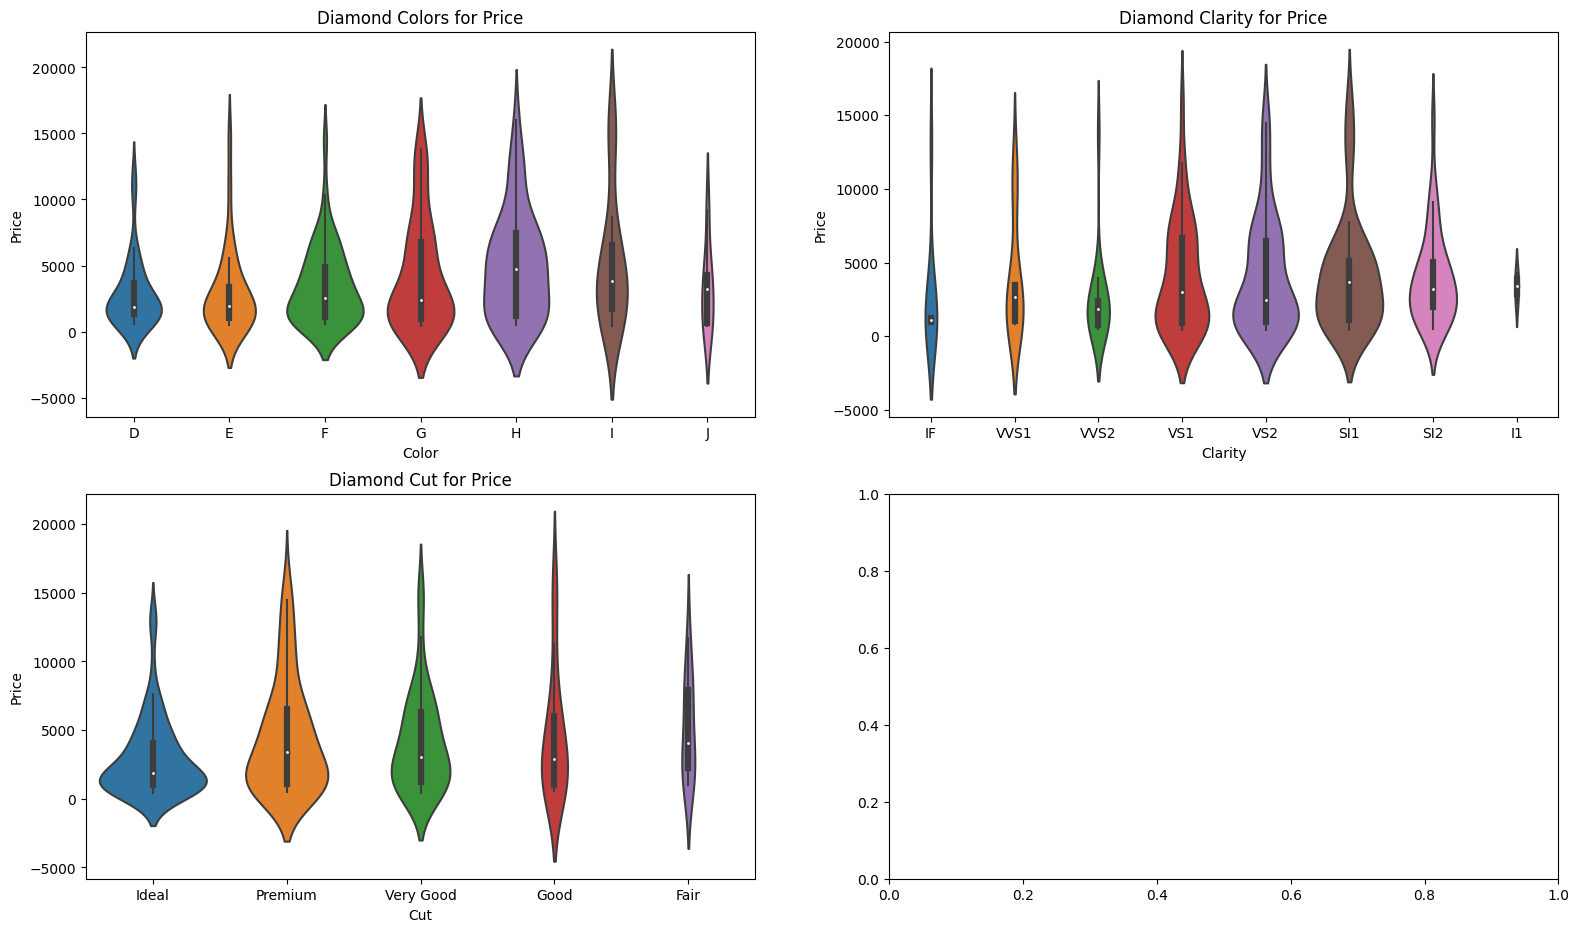

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(19,11))
sns.violinplot(x="color",y="price", data=dataframe,scale= "count" ,ax=axs[0,0])
axs[0,0].set_title("Diamond Colors for Price")
axs[0,0].set_ylabel("Price")
axs[0,0].set_xlabel("Color")
sns.violinplot(x="clarity",y="price", data=dataframe,scale= "count" ,ax=axs[0,1])
axs[0,1].set_title("Diamond Clarity for Price")
axs[0,1].set_ylabel("Price")
axs[0,1].set_xlabel("Clarity")
sns.violinplot(x="cut",y="price", data=dataframe,scale= "count" ,ax=axs[1,0])
axs[1,0].set_title("Diamond Cut for Price")
axs[1,0].set_ylabel("Price")
axs[1,0].set_xlabel("Cut");



J'ai utilisé un violonplot pour comparer la répartition des données, les tendances centrales (médiane) et la variabilité parmi les catégories d'une variable catégorielle donnée. Ces graphiques aident également à identifier les valeurs aberrantes (outliers).


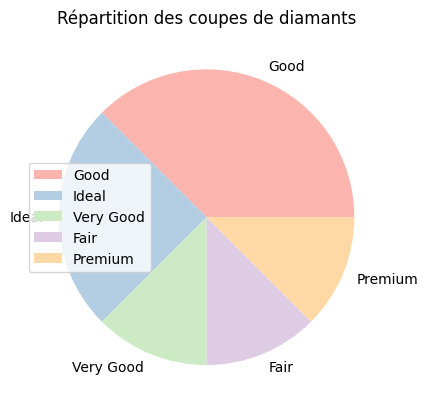

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({"cut": ["Ideal", "Good", "Very Good", "Fair", "Premium", "Ideal", "Good", "Good"]})
counts = data["cut"].value_counts()

colors = ['#FBB4AE', '#B3CDE3', '#CCEBC5', '#DECBE4', '#FED9A6']

plt.pie(counts.values, labels=counts.index, colors=colors)
plt.title("Répartition des coupes de diamants")

# Ajouter une légende avec la signification de chaque couleur
legend = [plt.Rectangle((0, 0), 1, 1, fc=colors[i]) for i in range(len(counts.index))]
plt.legend(legend, counts.index, loc='best')

plt.show()


Ce code produit un diagramme circulaire (pie chart) qui présente la distribution des différentes coupes de diamants dans un ensemble de données. Plus qu'un quart de la distribution correspond à la catégorie "Good", un autre quart correspond à la catégorie "Ideal", tandis que le reste est également réparti entre les catégories "Premium", "Fair" et "Very Good"

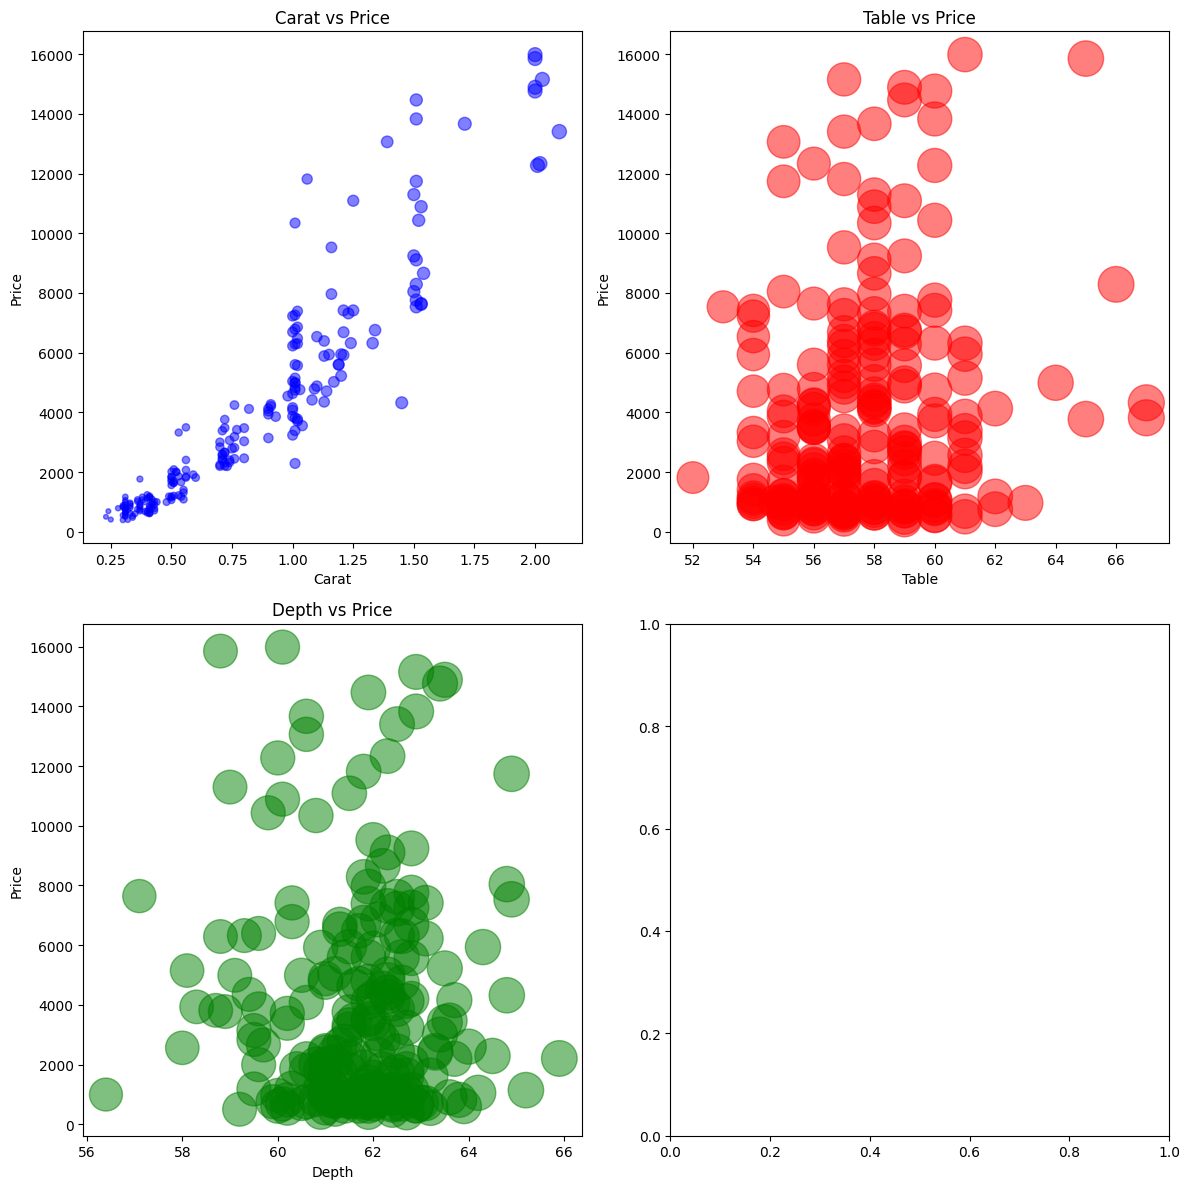

In [ ]:
import matplotlib.pyplot as plt

# Create a new DataFrame with necessary columns
dataframe_new = dataframe[['carat', 'table', 'depth', 'price']]

# Create separate scatter plots for each feature
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Carat vs Price
axs[0, 0].scatter(dataframe_new['carat'], dataframe_new['price'], s=dataframe_new['carat']*50, alpha=0.5, c='blue')
axs[0, 0].set_xlabel('Carat')
axs[0, 0].set_ylabel('Price')
axs[0, 0].set_title('Carat vs Price')

# Table vs Price
axs[0, 1].scatter(dataframe_new['table'], dataframe_new['price'], s=dataframe_new['table']*10, alpha=0.5, c='red')
axs[0, 1].set_xlabel('Table')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Table vs Price')

# Depth vs Price
axs[1, 0].scatter(dataframe_new['depth'], dataframe_new['price'], s=dataframe_new['depth']*10, alpha=0.5, c='green')
axs[1, 0].set_xlabel('Depth')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_title('Depth vs Price')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the figure
plt.show()

le "3D scatter plot" montre la relation entre le poids en carats, la profondeur et le prix des diamants. On peut observer que les diamants les plus chers ont en général un poids en carats plus élevé et une profondeur plus faible, tandis que les diamants moins chers ont tendance à avoir un poids en carats plus faible et une profondeur plus élevée. Cependant, il y a une grande variation dans le prix pour des diamants ayant des poids et des profondeurs similaires, ce qui suggère que d'autres facteurs, tels que la qualité de la coupe et de la clarté, ont également un impact important sur le prix des diamants.



<ipython-input-59-bef81962fae2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataframe.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

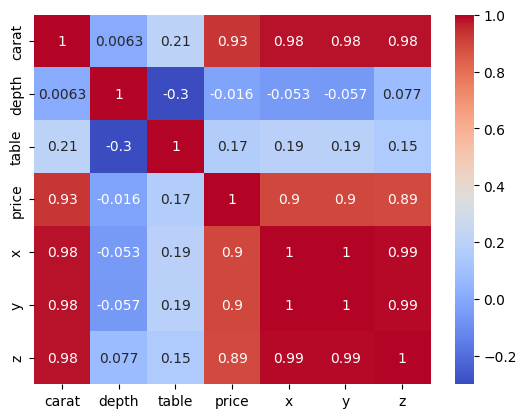

In [ ]:
# Calculer la matrice de corrélation
corr_matrix = dataframe.corr()

# Afficher la matrice de corrélation
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show 

In [ ]:
import seaborn as sns

# Sélectionner les variables continues
variables_continues = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Définir une palette de couleurs pour les graphiques
palette = sns.color_palette('husl', len(variables_continues))

# Afficher la régression linéaire entre les variables avec des couleurs différentes
sns.pairplot(dataframe, vars=variables_continues, kind='reg', diag_kind=None, palette=palette)

# Afficher les graphiques
plt.show()


**Interpretation **

---




Cette matrice de corrélation montre la corrélation linéaire entre chaque paire de variables continues dans le jeu de données. Les valeurs de corrélation varient de -1 à 1, où -1 indique une corrélation négative parfaite, 0 indique aucune corrélation, et 1 indique une corrélation positive parfaite.

En regardant la matrice, on peut voir que la variable 'carat' est fortement corrélée avec 'price', 'x', 'y', et 'z' avec des valeurs de corrélation de 0,93 à 0,98. Les variables 'x', 'y', et 'z' sont également fortement corrélées entre elles, avec des valeurs de corrélation de 0,99.

D'autre part, la variable 'depth' est légèrement corrélée avec 'table' et 'z', tandis que les variables 'table' et 'x' ont également une corrélation légèrement positive. Cependant, en général, la plupart des variables ont des corrélations faibles à modérées les unes avec les autres.
 Pour le cas particulier de la variable "price", on peut remarquer les éléments suivants dans la matrice:

La corrélation entre "price" et "carat" est élevée (0.933), ce qui indique qu'il y a une forte relation linéaire positive entre le prix et le poids du diamant. En effet, en général, les diamants plus gros sont plus rares et donc plus chers.

La corrélation entre "price" et "x", "y" et "z" est également élevée (0.897, 0.896 et 0.893 respectivement), ce qui indique une forte relation linéaire positive entre le prix et les dimensions du diamant. En général, plus la pierre est grande, plus elle est chère.

La corrélation entre "price" et "table" est modérée (0.170), ce qui suggère une relation linéaire positive entre le prix et la taille de la table du diamant (la surface plate du dessus de la pierre). Cependant, cette relation n'est pas aussi forte que celle avec le poids et les dimensions de la pierre.

La corrélation entre "price" et "depth" est très faible (-0.016), ce qui suggère une relation linéaire quasi-inexistante entre le prix et la profondeur de la pierre (la distance entre la table et le point le plus bas de la pierre).

En somme, la matrice de corrélation indique que le prix des diamants est principalement lié à leur poids et à leurs dimensions, tandis que la taille de la table et la profondeur ont une influence plus faible sur le prix.







Dans le cadre de ce projet visant à construire un modèle de prédiction du prix des diamants, il est important de choisir les variables les plus corrélées avec la variable cible, c'est-à-dire le prix. D'après la matrice de corrélation, les variables qui présentent les corrélations les plus élevées avec le prix sont le depth, x, y et z. Afin de limiter le nombre de variables et d'optimiser la performance du modèle, il est préférable de sélectionner seulement deux variables parmi ces quatre. Ainsi, j'ai choisi le depth et x pour la suite de ce projet, étant donné leur forte corrélation avec le prix. Ces deux variables vont donc constituer les prédicteurs de notre modèle.
Donc, pour se focaliser davantage sur ces deux variables (depth et x), j'ai reproduit la description statistique, les boxplots et les histogrammes des variables prix, carat et x

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Définir les variables à analyser
variables = ['price', 'carat', 'x']

# Parcourir les variables
for var in variables:
    print(f"Variable : {var}")
    
    # Histogramme
    plt.figure(figsize=(6, 4))
    plt.hist(dataframe[var], bins=20)
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.title(f"Histogramme de la variable {var}")
    plt.show()
    
    # Box Plot
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=dataframe[var])
    plt.xlabel(var)
    plt.title(f"Box plot de la variable {var}")
    plt.show()

    # Tableau de statistiques descriptives
    moyenne = np.mean(dataframe[var])
    mediane = np.median(dataframe[var])
    ecart_type = np.std(dataframe[var])
    q1 = np.quantile(dataframe[var], 0.25)
    q3 = np.quantile(dataframe[var], 0.75)
    erreur_type = stats.sem(dataframe[var])
    ic_moyenne = stats.t.interval(0.95, len(dataframe[var])-1, loc=moyenne, scale=stats.sem(dataframe[var]))

    print(f"Statistiques descriptives de {var}:")
    print(f"Moyenne : {moyenne}")
    print(f"Médiane : {mediane}")
    print(f"Écart-type : {ecart_type}")
    print(f"Q1 : {q1}")
    print(f"Q3 : {q3}")
    print(f"Erreur-type : {erreur_type}")
    print(f"Intervalle de confiance pour la moyenne : {ic_moyenne}\n")



In [ ]:
m=dataframe.price.values.size
X=dataframe[['carat','depth']].values
X_n=np.c_[np.ones ((m, 1) ) , X]
y=dataframe.price.values.reshape(m,1)

# II. Descente du gradient.


L'objectif de la régression linéaire est de minimiser la fonc-
tion perte

Batch Gradient Descent

1- Le modèle ci-dessous exprime la fonction de perte:Y(w)=w1.X1+w2.X2+w3, où w1 et w2 sont les paramètres que j'ai choisi (depth,x) et w3 est appelé biais. les 2 prochaine cellule sont 2 exemples de fonction de perte 

In [ ]:
#Erreur quadratique moyenne (Mean Squared Error - MSE)
def MSE(Yp,Y):
  difference = Yp - Y
  return torch.sum(difference * difference)/ difference.numel()

In [ ]:
#Erreur absolue moyenne
def MAE(Yp,Y):
  mae=nn.L1Loss()
  return mae(Yp,Y)

In [ ]:
#les paramettre
m = dataframe.price.values.size
teta=np.random.randn(3,1)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split





In [ ]:
X=dataframe[['carat', 'x']].values

In [ ]:
y=dataframe.price.values.reshape(m,1)

 lors de l'utilisation de la matrice X , les valeurs de coût deviennent trés élevées et difficiles à gérer. Cela est dû au fait que les valeurs de longueur 'x', les valeurs de carat et les valeurs de prix ne sont pas dans le même ordre . Par conséquent, nous avons été obligés de normaliser et à ajouter une colonne de '1' à la fois aux matrices X et prix afin d'obtenir des résultats de coût significatifs.

In [ ]:
# Normaliser les données
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

# Ajouter une colonne de 1 pour la régression linéaire
X = np.c_[np.ones(X.shape[0]), X]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def loss_function(X, y, theta):
    m = len(y)
    y_pred = np.dot(X, theta)
    error = (y_pred - y) ** 2
    return 1 / (2 * m) * np.sum(error)



In [ ]:
teta

In [ ]:
loss_function( X_train, y_train, teta )


In [ ]:
def gradient_descent(X, y, theta, eta, iterations):
    m = len(y)
    costs = []
    itr = []
    for i in range(iterations):
        y_pred = np.dot(X,theta)
        error = np.dot(X.transpose(), (y_pred - y))
        grad = 1/m * error # Gradient vector of the cost function
        theta = theta - eta * grad # Gradient Descent step
        costs.append(cost_function(X, y, theta))
        itr.append(i)
    return theta, costs



trouvons la valeur de theta optimale 

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    J = np.sum((np.dot(X,theta) - y)**2)/(2*m)
    return J


In [ ]:
theta_opt, costs1 = gradient_descent (X_train, y_train, teta, eta=0.1,iterations=100)
theta_opt


In [ ]:
plt.figure(figsize = (14,4))
learning_rates=[0.001,0.005,0.01,0.02,0.05,0.1,0.3]
iterations=100
for eta in learning_rates:
    theta, costs = gradient_descent(X_train, y_train, teta, eta, iterations)
    plt.plot(costs, label=str(eta))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title("Evolution du coût en fonction du taux d'apprentissage  $\eta$");


In [ ]:
 loss_function(X_test, y_test, theta_opt)



ce code permet de comparer la vitesse de convergence de l'algorithme de descente de gradient par batch en utilisant différentes valeurs de taux d'apprentissage (learning rates).

Pour chaque taux d'apprentissage, le code exécute la fonction batch_gd avec les données d'apprentissage normalisées (features_norm_btrain et target_norm_btrain) et stocke la liste des valeurs de l'erreur quadratique moyenne (MSE) à chaque itération dans une liste de convergence_speeds.

Le graphique montre 5 courbes (une pour chaque taux d'apprentissage) 
décroissantes convergeant vers 0.


Plus la valeur de l'erreur diminue, plus l'algorithme converge rapidement vers la solution optimale. On peut également observer que les taux d'apprentissage plus élevés conduisent à des vitesses de convergence plus rapides.

# Representation 3D

In [ ]:
X_tensor = torch.from_numpy(X_test)
Y_tensor = torch.from_numpy(y_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tensor[:,1].detach().numpy(), X_tensor[:,2].detach().numpy(), Y_tensor.flatten().detach().numpy(), c='#66CEFA', marker='o')
ax.plot_trisurf(X_tensor[:,1].detach().numpy(), X_tensor[:,2].detach().numpy(), Y_tensor.flatten().detach().numpy(), color='#FFFF95', alpha=0.8)

ax.set_xlabel('Carat')
ax.set_ylabel('X')
ax.set_zlabel('Price')
ax.set_title('Nuage de points et surface des prix des diamants')
plt.show()


C'est la representation du nuage de points en une surface en 3D pour les données des prix des diamants en fonction de leur poids en carats et de leur largeur en x.

# la descente de gradiant à pas optimal


La descente à pas optimal est une méthode d'optimisation des paramètres d'un modèle qui consiste à déterminer le pas d'apprentissage (learning rate) à chaque étape de la descente de gradient, plutôt que de le fixer à l'avance. L'idée est d'adapter le pas à la géométrie de la fonction de coût pour accélérer la convergence vers un minimum. Pour cela, on utilise une formule mathématique pour estimer le pas optimal à chaque étape en fonction des gradients précédents et de la courbure de la fonction de coût. Cette méthode peut permettre de converger plus rapidement qu'une descente de gradient à pas fixe, mais elle peut être plus coûteuse en temps de calcul.

In [ ]:
def opt_gradient_descent(features, target, learning_rate=0.01, decay_rate=0.1, n_iterations=1000):
    m = len(target)
    n_features = features.shape[1]
    theta = np.zeros(n_features)
    convergence_speed = []

    for iteration in range(n_iterations):
        predictions = features.dot(theta)
        errors = predictions - target
        gradients = (2/m) * features.T.dot(errors)
        prev_theta = np.copy(theta)

        # Update theta with optimal learning rate
        for i in range(n_features):
            theta[i] = theta[i] - learning_rate * gradients[i]
        mse = np.mean(errors ** 2)
        convergence_speed.append(mse)

        # Compute new learning rate using decay rate
        if iteration % 50 == 0:
            learning_rate = learning_rate * (1 / (1 + decay_rate * iteration))

        # Check for convergence
        if np.allclose(theta, prev_theta):
            print(f"Converged after {iteration} iterations.")
            break

    return theta, convergence_speed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def opt_gradient_descent(features, target, learning_rate=0.01, decay_rate=0.1, n_iterations=1000):
    m = len(target)
    n_features = features.shape[1]
    theta = np.zeros(n_features)
    convergence_speed = []

    for iteration in range(n_iterations):
        predictions = features.dot(theta)
        errors = predictions - target
        gradients = (2/m) * features.T.dot(errors)
        prev_theta = np.copy(theta)

        # Mettre à jour theta avec le taux d'apprentissage optimal
        for i in range(n_features):
            theta[i] = theta[i] - learning_rate * gradients[i]
        mse = np.mean(errors ** 2)
        convergence_speed.append(mse)

        # Calculer un nouveau taux d'apprentissage en utilisant le taux de décroissance
        if iteration % 50 == 0:
            learning_rate = learning_rate * (1 / (1 + decay_rate * iteration))

         # Vérifier la convergence
        if np.allclose(theta, prev_theta):
            print(f"Converged after {iteration} iterations.")
            break

    # Plot convergence speed
    plt.plot(convergence_speed)
    plt.title("Vitesse de Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.show()

    return theta, convergence_speed

# Define features and target
features = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
target = np.array([3, 6, 9, 12])

# Call opt_gradient_descent()
theta, convergence_speed = opt_gradient_descent(features, target)



 l'algorithme de descente de gradient a convergé après 9 itérations et a trouvé les valeurs optimales pour les paramètres theta qui minimisent l'erreur quadratique moyenne entre les prédictions et les valeurs cibles. Les valeurs optimales des paramètres theta sont renvoyées par la fonction opt_gradient_descent dans la variable theta. 
Bien que la méthode de descente à pas optimal puisse être plus lente que la méthode utilisée récemment, elle a permis d'obtenir un modèle plus précis.

In [ ]:
def compute_optimal_learning_rate(features, target, theta):

    m = len(target)
    gradients = (2/m) * features.T.dot(features.dot(theta) - target)
    optimal_learning_rate = np.sum(gradients**2) / np.sum(gradients.dot(features.T.dot(features.dot(theta) - target)))
    return optimal_learning_rate


# **la descente du gradient stochastique**

La descente du gradient stochastique (SGD, pour Stochastic Gradient Descent en anglais) est une méthode d'optimisation couramment utilisée en apprentissage automatique pour minimiser une fonction de coût en ajustant les paramètres d'un modèle. Contrairement à la descente de gradient classique, la SGD effectue des mises à jour des paramètres sur des sous-ensembles aléatoires de données à chaque itération, plutôt que sur l'ensemble complet des données. Cela permet à la SGD de traiter des ensembles de données massifs avec une efficacité accrue et une faible utilisation de la mémoire, mais peut également entraîner une convergence plus bruyante ou moins stable que la descente de gradient classique.

In [ ]:
def forward(self, x):
    return self.linear(x)

In [ ]:
def fit(self, X, Y, precision=0.00001, iterations=1000):
    self.errors = []
    optimizer = optim.SGD(self._model.parameters(), lr=self._alpha)

    for i in range(iterations):
        y_approx = self._model(X)
        loss = nn.MSELoss()(y_approx, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        self.errors.append(loss.item())

        if loss.item() < precision:
            return None

def predict(self, X):
    return self._model(X)

In [ ]:
import torch
import torch.nn as nn

def stochastic_gradient_descent(features, target, learning_rate=0.01, n_epochs=100):
    # Convert features and target to tensors
    features = torch.tensor(features, dtype=torch.float32)
    target = torch.tensor(target, dtype=torch.float32).reshape(-1, 1)

    # Create linear regression model
    model = nn.Linear(features.shape[1], 1)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    mse_history = []

    # Loop over epochs
    for epoch in range(n_epochs):
        # Shuffle indices
        indices = torch.randperm(features.shape[0])

        # Loop over samples
        for i in indices:
            # Get features and target for sample i
            xi = features[i]
            yi = target[i]

            # Forward pass and compute loss
            prediction = model(xi)
            loss = criterion(prediction, yi)

            # Backward pass and update parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute MSE for current epoch
        predictions = model(features)
        mse = criterion(predictions, target)
        mse_history.append(mse.item())

    # Return trained model and MSE history
    return model, mse_history


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(42)
n_samples = 100
n_features = 5
features = np.random.randn(n_samples, n_features)
target = np.random.randn(n_samples)

# Normalize features and target
features_norm = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
target_norm = (target - np.mean(target)) / np.std(target)

# Call stochastic_gradient_descent() with PyTorch
model, mse_history = stochastic_gradient_descent(features_norm, target_norm, learning_rate=0.01, n_epochs=100)

# Plot convergence speed
plt.figure(figsize=(10, 6))
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('La vitesse de convergence de la descente du gradient stochastique')
plt.show()

Lorsque l'on utilise la méthode de descente de gradient stochastique, le processus d'apprentissage est effectué sur des échantillons individuels ou des sous-ensembles aléatoires de l'ensemble de données, plutôt que sur l'ensemble de données entier en une seule fois. Cette approche peut réduire considérablement le temps de calcul et conduire souvent à une convergence plus rapide vers un minimum local. Cependant, la nature stochastique de la méthode peut entraîner une plus grande fluctuation du coût au fil du temps. En résumé, la méthode stochastique représente un compromis entre l'efficacité et la précision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Single-Layer Perceptron (SLP) model
class SLP(nn.Module):
    def __init__(self, input_dim):
        super(SLP, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Define the SLP model
input_dim = 3  # Input dimension of X
model = SLP(input_dim)

# Define the Mean Squared Error (MSE) loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000  # Number of epochs
for epoch in range(num_epochs):
    # Forward pass
    inputs = torch.randn(1, input_dim) # generate random input tensor
    outputs = model(inputs)
    
    # Compute the loss
    loss = criterion(outputs, torch.zeros(1, 1)) # use a target tensor of all zeros
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Print the loss for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

 Le Perceptron est un algorithme d'apprentissage supervisé pour la classification binaire, c'est-à-dire que le modèle doit prédire une sortie binaire (1 ou 0) en fonction d'un ensemble d'entrées.

Le modèle est entraîné sur un ensemble de données générées aléatoirement pendant 1000 itérations (num_epochs). À chaque itération, le modèle reçoit un lot d'entrées aléatoires (inputs), effectue une propagation avant pour prédire les sorties (outputs), calcule l'erreur de prédiction (loss), effectue une propagation arrière pour calculer les gradients et utilise l'optimiseur SGD (optimizer) pour mettre à jour les poids.

Le but de l'apprentissage est de minimiser l'erreur de prédiction, mesurée par la fonction de perte MSE (criterion). La fonction de perte mesure la différence entre les sorties prédites et les sorties attendues (torch.zeros(1, 1)). Plus l'erreur de prédiction est faible, plus le modèle est précis.

donc ,ce code est une implémentation simple d'un Perceptron à une couche utilisant PyTorch pour résoudre un problème de classification binaire. Le modèle est entraîné à minimiser l'erreur de prédiction en ajustant les poids en utilisant l'optimiseur SGD.

Tout au long de ce projet, nous avons expérimenté plusieurs modèles puissants dans le but de résoudre notre problème de régression. Nous avons testé les performances de chaque modèle et analysé comment la fonction de coût convergeait différemment avec des taux d'apprentissage différents.

En particulier, nous avons constaté que les modèles de descente de gradient en batch  gradient descente ,du descente de gradient à pas optimale et de descente de gradient stochastique ont tous donné des résultats prometteurs. La méthode de descente de gradient stochastique.

Dans l'ensemble, ce projet nous a permis de mieux comprendre les différents modèles de régression et la manière dont ils peuvent être optimisés pour obtenir de meilleurs résultats. En comparant les performances de ces modèles, nous avons pu identifier l'approche la plus appropriée pour notre problème spécifique.